# Perceptron 
A perceptron is a supervised learning algorithm for binary classifiers. Binary classifiers determine whether an input, which is typically represented by a series of vectors, belongs to a particular class. In a nutshell, a perceptron is a one-layer neural network and a multi-layer perceptron is referred to as a neural network. They are made up of four major components: input values, weights and bias, net sum, and an activation function. Perceptron is commonly used to divide data into two parts. As a result, it is also referred to as a Linear Binary Classifier. This algorithm enables neurons to learn and process training set elements one at a time.

# Explanation of the intuition behind the Perceptron algorithm.
The perceptron is a simple model of an artificial neuron. Given an input X and a set of weights W, the perceptron performs a linear combination of the inputs weighted by the weights. The result is passed through an activation function that produces the output of the perceptron, which is 1 if the linear combination is greater than a threshold and 0 otherwise.

The key idea is to adjust the weights during training so that the perceptron can learn to correctly classify the input data.

**Perceptron working:**

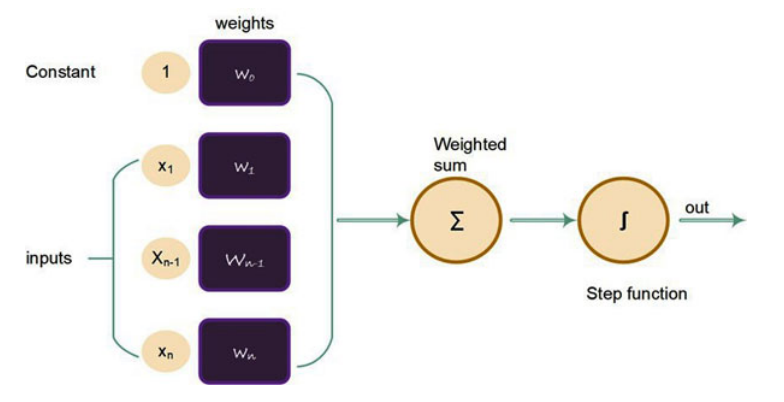

# Pseudocode for the Perceptron Algorithm
The perceptron operates on the following simple steps:

**Step 1:** All the X inputs are multiplied by their weights W.
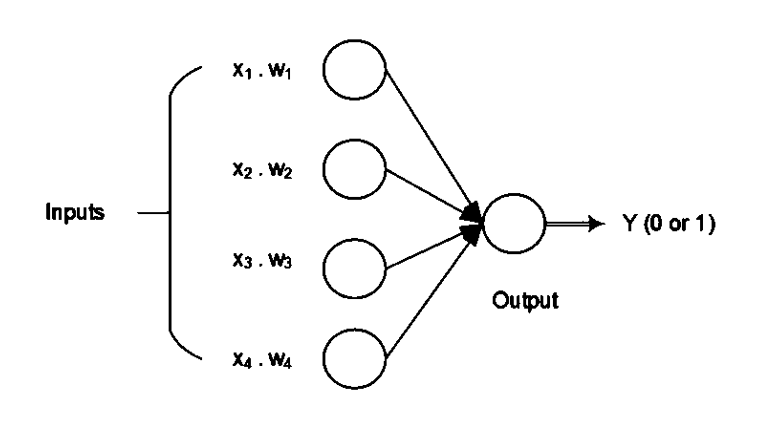

**Step 2:** Weighted Sum is the sum of all the multiplied values.

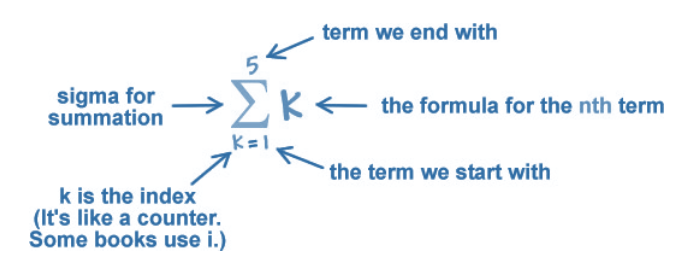

**Step 3:** Use that weighted sum to find the appropriate activation function.

**Note:**
For each training example (Xi,yi), do:

•	Calculate the perceptron output: output=activation (∑j=1nWj⋅Xij+b)

•	Update weights: Wj=Wj+α⋅(yi−output)⋅Xij for each j, where α is the learning rate.

•	Update bias: b=b+α⋅(yi−output)




# Implementation of the algorithm


In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Sonar dataset
sonar = pd.read_csv('data/sonar_csv.csv')
sonar["Class"] = sonar["Class"].map({"Mine": 1, "Rock": 0})

# Extract features and target variable
features = sonar.drop(columns=["Class"])
target = sonar["Class"]

# Check for missing values in features and handle them
features = features.fillna(features.mean())

# Check for missing values in the target variable
print("Missing values in target:", target.isnull().sum())

# Drop rows with missing values in the target variable
sonar = sonar.dropna(subset=['Class'])

# Drop rows with NaN values in the target variable
train_data = train_data.dropna(subset=['Class'])
target_train = train_data['Class']
sonar_train_scaled = train_data.drop(columns=['Class']).to_numpy()

# Print a few rows of training data and target after handling NaN values
print("Training Data:")
print(train_data.head())
print("Training Target:")
print(target_train.head())

# Scale the entire dataset before splitting into training and testing sets
scaler = StandardScaler()
sonar_scaled = scaler.fit_transform(features)

# Split the scaled dataset into training and testing sets
sonar_train, sonar_test, target_train, target_test = train_test_split(
    sonar_scaled, target, test_size=0.2, random_state=42
)

# Combine scaled features and target into a single DataFrame for better visualization
train_data = pd.DataFrame(sonar_train, columns=features.columns)
train_data['Class'] = target_train.reset_index(drop=True)  # Add target column

# Drop rows with NaN values in the target variable
train_data = train_data.dropna(subset=['Class'])
target_train = train_data['Class']
sonar_train_scaled = train_data.drop(columns=['Class']).to_numpy()

# Declare perceptron class and methods
class Perceptron:
    """Perceptron class for binary classification."""

    def __init__(self, learning_rate=0.01, num_epochs=1000):
        """Initialize the perceptron with specified parameters."""
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.weights = None
        self.bias = None
      
    def train(self, X, y, epsilon=1e-5, verbose=True):
        """Train the perceptron model."""
        num_samples, num_features = X.shape
        self.weights = np.random.uniform(-0.1, 0.1, num_features)
        self.bias = np.random.uniform(-0.1, 0.1)

        for epoch in range(self.num_epochs):
            for i in range(num_samples):
                linear_output = np.dot(X[i], self.weights) + self.bias
                y_predicted = self.activate(linear_output)

                update = self.learning_rate * (y[i] - y_predicted)
                self.weights += update * X[i]
                self.bias += update

                # Print intermediate values if verbose is True
                if verbose and i % 50 == 0:
                    print(f"Epoch {epoch}, Sample {i}, Prediction: {y_predicted}, Actual: {y[i]}")

            # Perform gradient checking every 100 epochs
            if epoch % 100 == 0:
                gradients, _ = self.numerical_gradient_check(X, y, self.weights, self.bias, epsilon)
                gradients_diff = np.linalg.norm(gradients - self.gradient_weights(X, y), ord=2)

                if np.isnan(gradients_diff):
                    print(f"NaN found in gradients at epoch {epoch}. Check numerical gradient calculation.")
                    return

                print(f"Epoch {epoch}, Gradients Difference: {gradients_diff}")

    def activate(self, x, derivative=False):
        """Sigmoid activation function."""
        if derivative:
            return self.activate(x) * (1 - self.activate(x))
        else:
            return 1 / (1 + np.exp(-x))

    def predict(self, X):
        """Make predictions using the trained perceptron."""
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = np.round(self.activate(linear_output))
        return y_predicted

    def loss(self, y_true, y_pred):
        """Mean square error loss function."""
        return np.mean((y_true - y_pred) ** 2)

    def accuracy(self, y_true, y_pred):
        """Calculate accuracy."""
        correct = np.sum(y_true == y_pred)
        total = len(y_true)
        return correct / total

    def numerical_gradient_check(self, X, y, weights, bias, epsilon=1e-5):
        """Perform numerical gradient checking."""
        original_weights = np.copy(weights)
        original_bias = np.copy(bias)

        gradient_weights = np.zeros_like(weights)
        gradient_bias = 0.0

        for i in range(len(weights)):
            weights[i] = original_weights[i] + epsilon
            loss_positive = self.loss(y, self.predict(X))
            weights[i] = original_weights[i] - epsilon
            loss_negative = self.loss(y, self.predict(X))

            gradient_weights[i] = (loss_positive - loss_negative) / (2 * epsilon)
            weights[i] = original_weights[i]

        bias = original_bias + epsilon
        loss_positive = self.loss(y, self.predict(X))
        bias = original_bias - epsilon
        loss_negative = self.loss(y, self.predict(X))

        gradient_bias = (loss_positive - loss_negative) / (2 * epsilon)
        bias = original_bias

        return gradient_weights, gradient_bias

    def gradient_weights(self, X, y):
        """Compute gradients for weights using backpropagation."""
        num_samples = X.shape[0]
        gradients = np.zeros_like(self.weights)

        for i in range(num_samples):
            linear_output = np.dot(X[i], self.weights) + self.bias
            y_predicted = self.activate(linear_output)

            error = y[i] - y_predicted
            gradients += error * self.activate(linear_output, derivative=True) * X[i]

        return gradients
        
# Create an instance of the Perceptron class
perceptron_model = Perceptron(learning_rate=0.01, num_epochs=1000)

# Train the perceptron with the training data
perceptron_model.train(sonar_train_scaled, target_train, verbose=False)  # Set verbose to False

# Make predictions on the test set
predictions = perceptron_model.predict(sonar_test)

# Calculate accuracy on the test set
accuracy = perceptron_model.accuracy(target_test, predictions)

# Print the final training results
print("Training Results:")
print(f"Accuracy: {accuracy}")

Missing values in target: 0
Training Data:
   attribute_1  attribute_2  attribute_3  attribute_4  attribute_5  \
0    -0.451872    -0.043690     1.342558     0.614178    -0.907683   
1    -0.456232    -0.116681    -0.705146    -0.779738    -0.647842   
2     0.332935     0.056674    -0.316474    -0.529824     0.122659   
3     0.511697     0.111417     0.351313    -0.880996    -1.026777   
4     1.004381     0.160078    -0.673843    -0.531979    -0.723629   

   attribute_6  attribute_7  attribute_8  attribute_9  attribute_10  ...  \
0    -0.945848     0.335069     0.734585     0.078721     -0.206269  ...   
1     0.990954     1.314965     0.407323     0.463980      0.448504  ...   
2     0.502514    -0.091608    -0.806372    -1.375951     -1.175752  ...   
3    -0.045286    -0.265199    -0.327251     0.441965      0.131558  ...   
4     0.212502     0.064137    -0.200113    -0.442014      0.332912  ...   

   attribute_52  attribute_53  attribute_54  attribute_55  attribute_56  \
0   

# Loss function + Optimization function identification.

In my perceptron implementation, I chose the Mean Square Error (MSE) as the loss function. The MSE is a measure of the average squared difference between the predicted and actual values. It is defined in my code as follows:

In [ ]:
def loss(self, y_true, y_pred):
    """Mean square error loss function."""
    return np.mean((y_true - y_pred) ** 2)

For optimization, the perceptron is trained using stochastic gradient descent, where the weights and bias are updated based on the negative gradient of the loss function with respect to the weights and bias. 

In [ ]:
def train(self, X, y, epsilon=1e-5, verbose=True):
    """Train the perceptron model."""
    num_samples, num_features = X.shape
    self.weights = np.random.uniform(-0.1, 0.1, num_features)
    self.bias = np.random.uniform(-0.1, 0.1)

    for epoch in range(self.num_epochs):
        for i in range(num_samples):
            linear_output = np.dot(X[i], self.weights) + self.bias
            y_predicted = self.activate(linear_output)

            update = self.learning_rate * (y[i] - y_predicted)
            self.weights += update * X[i]
            self.bias += update

 In the train method of the Perceptron class, I iterated through the training data for a specified number of epochs. For each training sample, I computed the linear output, made predictions using the sigmoid activation function, and updated the weights and bias based on the negative gradient of the loss function with respect to these parameters. The update rule is as follows:

In [ ]:
update = self.learning_rate * (y[i] - y_predicted)
self.weights += update * X[i]
self.bias += update